In [1]:
from chess import Chess
from model import Model
from DQNAgent import DQNAgent
from memory import Memory

In [2]:
chessenv=Chess()
agent=DQNAgent(0.9,0.1,0.01,10000)
batch_size=500

c:\Users\Sujal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [3]:
for episode in range(101):
    chessenv.reset()
    while chessenv.game_end() == False:
        board=chessenv.board
        legal_moves=chessenv.legal_moves()
        action = agent.get_action(legal_moves)
        board.make_move(action)
        chessenv.update_state(action)
        state = chessenv.state
        black_legal_moves=chessenv.legal_moves()
        black_action = agent.get_action(legal_moves)
        black_board=chessenv.visualisation_board()
        black_board.make_move(black_action)
        black_board.update_state(black_action)
        #intermidiate_state=black_board.state
        target_legal_moves=black_board.legal_moves()
        reward=chessenv.reward(black_board)
        next_action,next_state=agent.target_get_action(target_legal_moves)
        agent.memory.push(state,reward,next_state)
        if len(agent.memory)>batch_size:
            agent.memory.update(batch_size)

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: <chess.Chess object at 0x00000212DA29DB50> (of type <class 'chess.Chess'>)

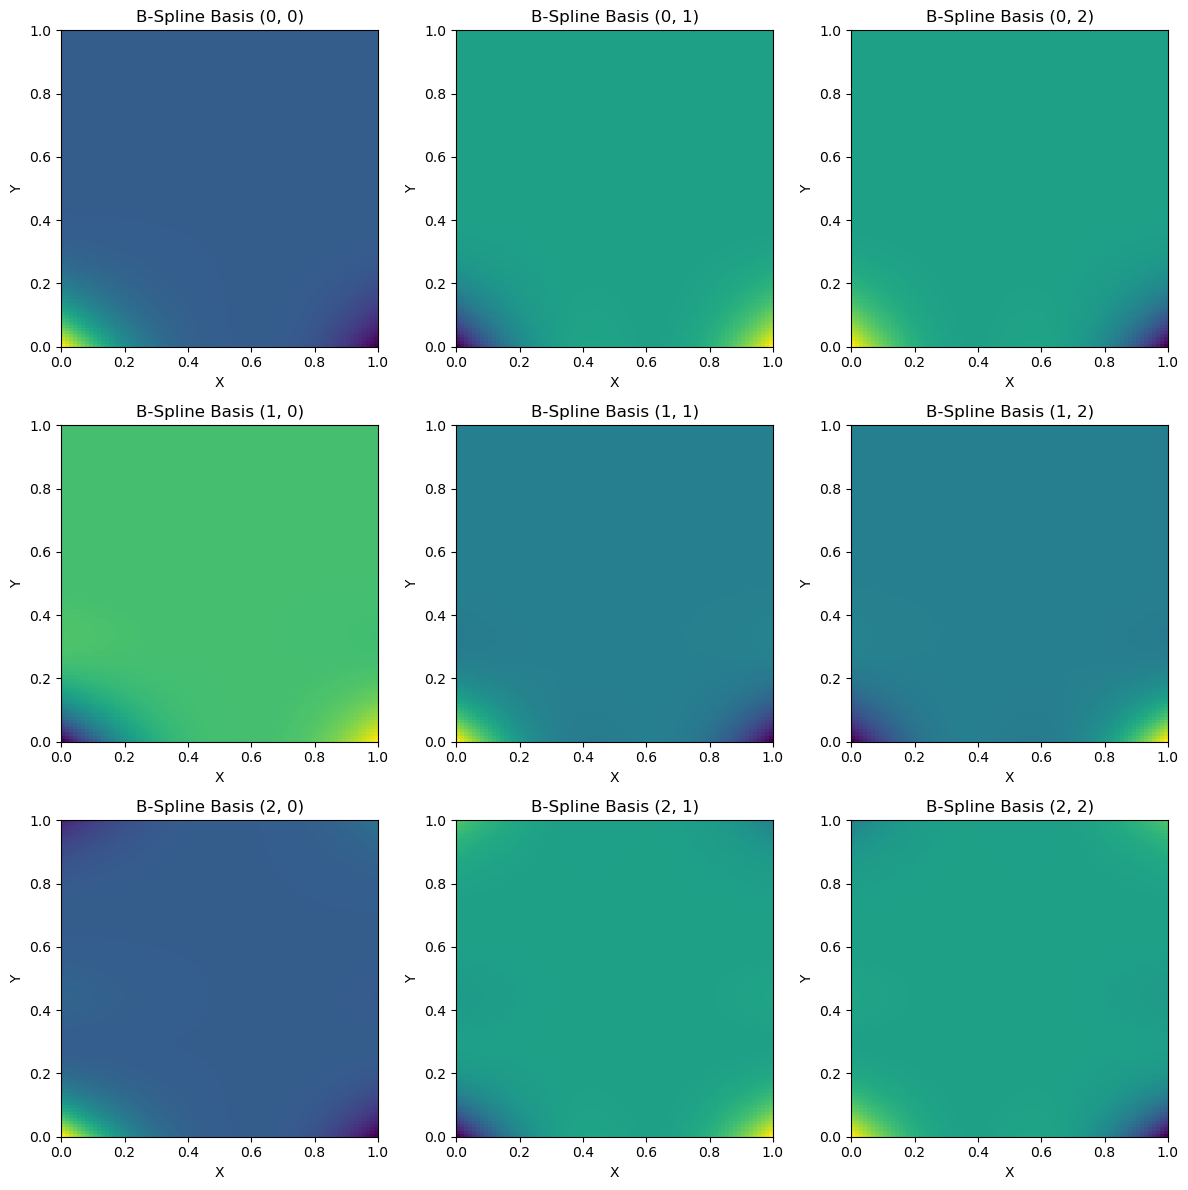

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Define knots and degrees for each dimension
knots_x = np.linspace(0, 1, 10)  # Knots for the x-dimension
knots_y = np.linspace(0, 1, 8)   # Knots for the y-dimension
degree = 3                       # Degree of the B-splines

# Define the grid of points in the two-dimensional space
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 80)
X, Y = np.meshgrid(x_values, y_values)

# Compute the tensor product of univariate B-spline basis functions
Bx = BSpline(knots_x, np.eye(len(knots_x)), degree)
By = BSpline(knots_y, np.eye(len(knots_y)), degree)
Bxy = np.zeros((len(x_values), len(y_values), len(knots_x), len(knots_y)))

for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        Bxy[i, j] = np.outer(Bx(x), By(y))

# Plot the tensor product B-spline basis functions
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        ax = axs[i, j]
        ax.imshow(Bxy[:, :, i, j], origin='lower', extent=(0, 1, 0, 1), cmap='viridis')
        ax.set_title(f'B-Spline Basis ({i}, {j})')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
plt.tight_layout()
plt.show()


















In [ ]:
for episode in range(101):
    chessevn.reset()
    while chessenv.game_end() == False:
        state = chessevn.get_state()
        action = agent.get_action(state)
        reward, done = chessevn.step(action)
        next_state = chessevn.get_state()
        agent.remember(state, action, reward, next_state, done)
    if episode > 50:
        agent.replay()
    print(f"Episode: {episode}, Reward: {reward}, Epsilon: {agent.epsilon}")
    if episode % 10 == 0:
        agent.save_model(f"model-{episode}.h5")

NameError: name 'chessevn' is not defined